In [39]:
%run gradients
%run representation_analysis
%run read_experiments
%run trajectories

from scipy import stats
import matplotlib.patches as mpatches
import matplotlib.image as mpimg

pplt.rc.reset()

def add_abc_to_subaxes(ax, text='A.', left=0, top=1.05):
    '''
    Add ABC type labels to specific subaxes similar to those
    from proplot
    
    Note that if creating a single ax as in fig, ax = pplt.subplots()
    the ax to pass in is add_abc_to_subaxes(ax[0]) since it works
    with subaxes specifically
    '''
    abc_kw = pplt.rc.fill(
        {
            'size': 'abc.size',
            'weight': 'abc.weight',
            'color': 'abc.color',
            'family': 'font.family',
        },
        context=True
    )
    border_kw = pplt.rc.fill(
        {
            'border': 'abc.border',
            'borderwidth': 'abc.borderwidth',
            'bbox': 'abc.bbox',
            'bboxpad': 'abc.bboxpad',
            'bboxcolor': 'abc.bboxcolor',
            'bboxstyle': 'abc.bboxstyle',
            'bboxalpha': 'abc.bboxalpha',
        },
        context=True,
    )
    kw = {'zorder': 3.5, 'transform': ax.transAxes}
    
    ax.text(left, top, text, **abc_kw, **border_kw, **kw)

    
def set_rc():
    pplt.rc.reset()
    pplt.rc.update({
        'font.size': 14,
        'font.family': 'Arial',
        'hatch.linewidth': 1,
    })
set_rc()
rgb_colors = color_cycle('default')

all_chks = {16: [0, 50, 100, 150, 300, 600, 1000, 1500],
            32: [0, 20, 40, 80, 150, 300, 600, 900]}
batch_sizes = [16, 32]


all_aux_tasks = {
    'control': ['none'],
    'num': ['wall0', 'wall1', 'wall01', 'goaldist', 'terminal'],
    'cat': ['catwall0', 'catwall1', 'catwall01', 'catquad', 'catfacewall'],
    'rew': ['rewdistscale0015', 'rewexplore']
}
all_aux_titles = {
    'control': ['Control'],
    'num': ['\u25A0 Angle Dist. (E)', 
            '\u25A0 Angle Dist. (N)', '\u25A0 Angle Dist. (N/E)', 
            '\u25A0 Goal Dist.', '\u25A0 Terminal Pred.'],
    'cat': [u'\u00D7 Left Right (E)', u'\u00D7 Left Right (N)', 
            u'\u00D7 Left Right (N/E)', u'\u00D7 Quadrant Pos.', 
            u'\u00D7 Faced Wall'],
    'rew': [u'\u25B2 Dist. Bonus', u'\u25B2 Explore Bonus']
}
all_aux_labels = {
    'control': ['Control'],
    'num': ['Angle Dist. (E)', 
            'Angle Dist. (N)', 'Angle Dist. (N/E)', 
            'Goal Dist.', 'Terminal Pred.', ],
    'cat': [u'Left Right (E)', u'Left Right (N)', u'Left Right (N/E)',
            u'Quadrant Pos.', u'Faced Wall', ],
    'rew': [u'Dist. Bonus', u'Explore Bonus']
}
all_exp_strings = {
    'control': 'nav_pdistal_batchaux/nav_pdistal_batch16aux{}',
    'num': 'nav_pdistal_batchauxcoef1/nav_pdistal_batch16aux{}coef1',
    'cat': 'nav_pdistal_auxcatcoef1/nav_pdistal_batch16aux{}coef1',
    'rew': 'nav_pdistal_batchaux/nav_pdistal_batch16aux{}',
}
all_marker_styles = {
    'control': 'o',
    'num': 's',
    'cat': 'x',
    'rew': '^',
}

In [9]:
'''Load data for this section'''

# Activation heatmaps
all_hm_res = pickle.load(open('data/pdistal_batchaux_heatmap/all_hms', 'rb'))
# Behavior classification
all_class_res = pickle.load(open('data/trajectories/aux_classification_results', 'rb'))
# Spatial silhouette scores
all_hm_sils = pickle.load(open('data/pdistal_batchaux_heatmap/all_hm_sils', 'rb'))
all_hm_spatial_scores = pickle.load(open('data/pdistal_batchaux_heatmap/all_hm_spatial_scores', 'rb'))

# Angle heatmaps
all_angle_stats = pickle.load(open('data/pdistal_batchaux_heatmap/all_angle_stats', 'rb'))
all_angle_hms = pickle.load(open('data/pdistal_batchaux_heatmap/all_angle_hms', 'rb'))

# MWM Cartoon

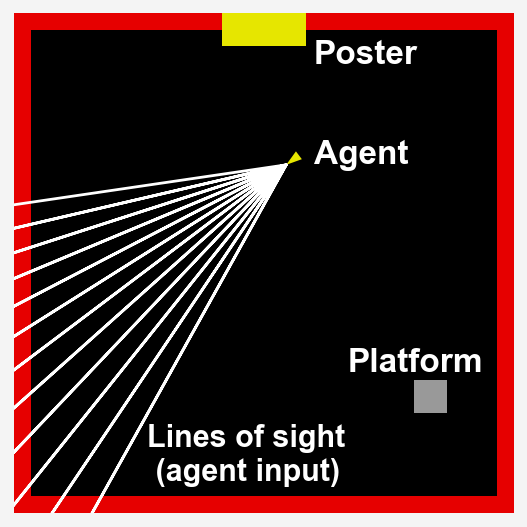

In [7]:
env_kwargs = pickle.load(open('../trained_models/ppo/nav_pdistal_batchaux/nav_pdistal_batch16auxnone_env', 'rb'))

pplt.rc.update({
    'axes.spines.bottom': False,
    'axes.spines.top': False,
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.facecolor': 'black',
    'axes.grid': False
})

fig, ax = pplt.subplots()

env_kwargs['wall_thickness'] = 10
env_kwargs['poster_thickness'] = 20
env = gym.make('NavEnv-v0', **env_kwargs)
np.random.seed(0)
env.reset()
env.render('human', ax=ax)

ax.format(xlim=[0, 300], ylim=[0, 300])
ax.text(180, 270, 'Poster', fontsize=12, c='white', fontweight='bold')
ax.text(180, 210, 'Agent', fontsize=12, c='white', fontweight='bold')
ax.text(80, 20, 'Lines of sight \n (agent input)', fontsize=11, c='white', fontweight='bold')
ax.text(200, 85, 'Platform', fontsize=12, c='white', fontweight='bold')

fig.savefig('plots/poster/1_mwm.jpg', dpi=1200)

# Auxiliary Task Examples

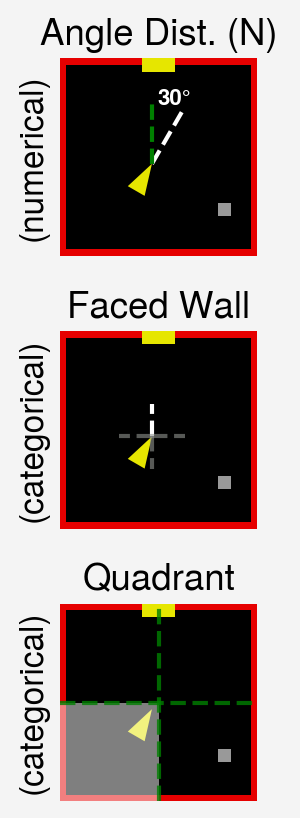

In [153]:
env_kwargs = pickle.load(open('../trained_models/ppo/nav_pdistal_batchaux/nav_pdistal_batch16auxnone_env', 'rb'))
pplt.rc.reset()
pplt.rc.update({
    'axes.spines.bottom': False,
    'axes.spines.top': False,
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.facecolor': 'black',
    'axes.grid': False,
    'font.size': 12
})


fig, ax = pplt.subplots(nrows=3, sharex=False, sharey=False,
                       figwidth=1.5)

env_kwargs['wall_thickness'] = 10
env_kwargs['poster_thickness'] = 20
env = gym.make('NavEnv-v0', **env_kwargs)


env.reset()
env.character.render_rays = False
env.character.size = 50
env.character.pos = np.array([140, 140])
angle = np.pi/3
env.character.angle = np.pi/3

# Numerical Tasks
# North angle dist
env.render('human', ax=ax[0])
ax[0].plot([140, 140+np.cos(angle)*100], [140, 140+np.sin(angle)*100], '--', c='white', )
ax[0].plot([140, 140+np.cos(np.pi/2)*100], [140, 140+np.sin(np.pi/2)*100], '--', c='green', )
ax[0].text(148, 230, '30°', c='white', fontsize=8, fontweight='bold')

#Categorical Tasks
# Faced Wall
env.render('human', ax=ax[1])
ax[1].plot([140, 140+np.cos(np.pi/2)*50], [140, 140+np.sin(np.pi/2)*50], '--', c='white', )
ax[1].plot([140, 140+np.cos(np.pi)*50], [140, 140+np.sin(np.pi)*50], '--', c='gray', alpha=0.6)
ax[1].plot([140, 140+np.cos(3*np.pi/2)*50], [140, 140+np.sin(3*np.pi/2)*50], '--', c='gray', alpha=0.6)
ax[1].plot([140, 140+np.cos(0)*50], [140, 140+np.sin(0)*50], '--', c='gray', alpha=0.6)

# Quadrant position
env.render('human', ax=ax[2])
rect = plt.Rectangle([0, 0], 150, 150, fc='white', alpha=0.5)
ax[2].add_patch(rect)
ax[2].plot([150, 150], [0, 300], '--', c='green', alpha=0.8)
ax[2].plot([0, 300], [150, 150], '--', c='green', alpha=0.8)

ax.format(xlim=[0, 300], ylim=[0, 300],
         title=['Angle Dist. (N)', 'Faced Wall', 'Quadrant',])
ax[0].format(ylabel='(numerical)')
ax[1:].format(ylabel='(categorical)')

set_rc()
fig.savefig('plots/poster/aux_tasks.jpg', dpi=1200)

# Representations

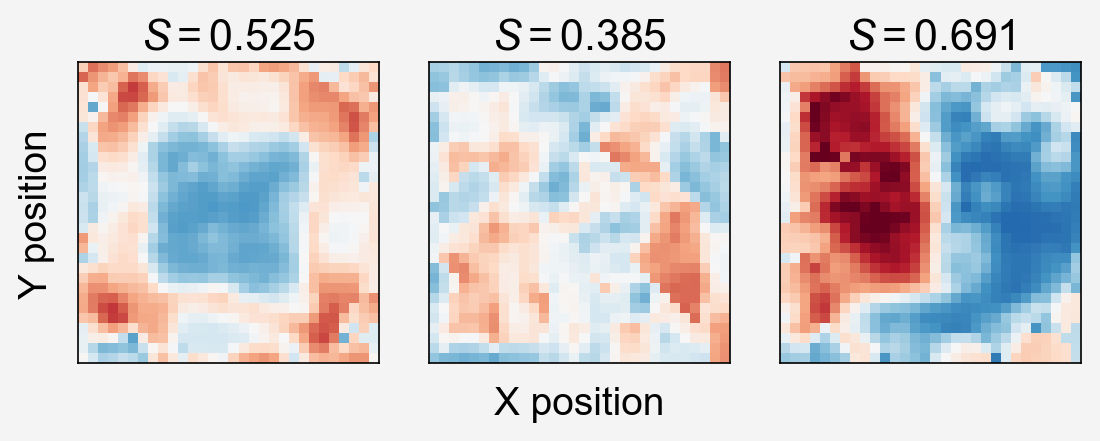

In [40]:
aux_tasks = ['none', 'none', 'catquadcoef1']
aux_batch_sizes = [32, 16, 16]
aux_trials = [0, 0, 0]
aux_chks = [40, 100, 1500]
aux_nodes = [3, 1, 1]
activ_type = 'actor_activations'
layer_idx = 0


fig, ax = pplt.subplots(nrows=1, ncols=3, figwidth=5.5)
title = []
for i in range(3):
    aux = aux_tasks[i]
    batch = aux_batch_sizes[i]
    chk = aux_chks[i]
    trial = aux_trials[i]
    node = aux_nodes[i]
    
    
    hms = all_hm_res[batch][aux]['comb'][trial][chk][activ_type][layer_idx].astype('float32')
    # sil_score, hm_dists = compute_spatial_silhouette(hms)
    
    cbar = ax[i].imshow(hms[node] - hms[node].mean(), vmin=-1, vmax=1)
    sil_score = spatial_representation_exponential_score(hms[node])
    title.append(f'$S = {sil_score:.3f}$')
    
    # print(np.abs(hms[node] - hms[node].mean()).sum())
    
ax.format(xticks=[], yticks=[], xlabel='X position', ylabel='Y position',
          title=title)
# fig.colorbar(cbar, tickminor=False, locator=[-1, 0, 1])

fig.savefig('plots/poster/spatial_reps.jpg', dpi=1200)


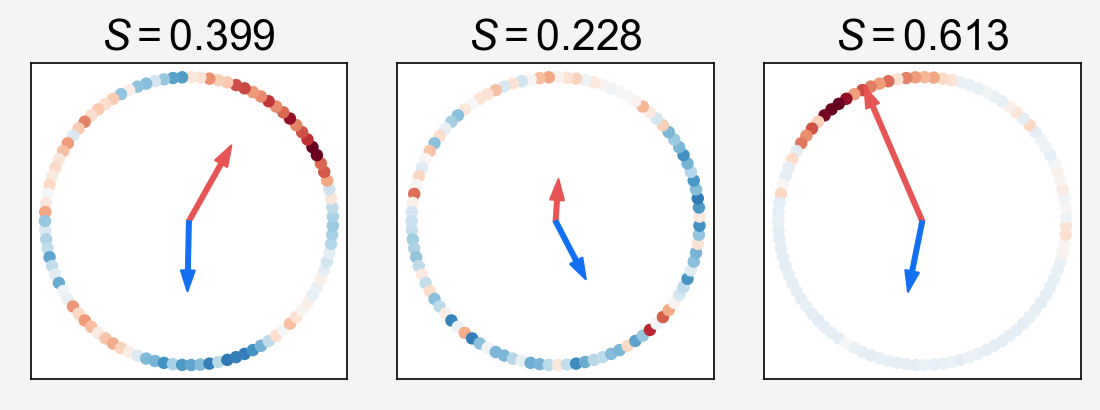

In [51]:
aux_tasks = ['none', 'wall0coef1', 'goaldistcoef1', 
             'catquadcoef1', 'catwall0coef1', 'catfacewallcoef1']
aux_batch_sizes = [16, 16, 16, 16, 16, 16]
aux_trials = [0, 0, 0, 0, 0, 0]
aux_chks = [300, 50, 1500, 1500, 1500, 1000]
aux_nodes = [0, 1, 0, 1, 0, 1]
activ_type = 'actor_activations'
layer_idx = 0

uniform_angles = np.linspace(-np.pi, np.pi, 100)
x = np.cos(uniform_angles)
y = np.sin(uniform_angles)

fig, ax = pplt.subplots(ncols=3, figwidth=5.5)
title = []
for i, j in enumerate([0, 2, 5]):
    aux = aux_tasks[j]
    batch = aux_batch_sizes[j]
    chk = aux_chks[j]
    trial = aux_trials[j]
    node = aux_nodes[j]
    
    angle_stats = all_angle_stats[batch][aux]['comb'][trial][chk][activ_type][layer_idx]
    
    weights = angle_stats['filtered_weights']

    pos_direction, pos_length, neg_direction, neg_length = positive_negative_resultants(weights)
    cbar = ax[i].scatter(x, y, c=weights[node], s=15, vmin=-1, vmax=1)
    # ax[i].plot([0, np.cos(direction)*length], [0, np.sin(direction)*length])
    ax[i].arrow(0, 0, np.cos(pos_direction[node])*pos_length[node], 
                np.sin(pos_direction[node])*pos_length[node],
                head_width=0.1, color=(0.9, 0.33, 0.33, 1), width=0.03)
    ax[i].arrow(0, 0, np.cos(neg_direction[node])*neg_length[node], 
                np.sin(neg_direction[node])*neg_length[node],
                head_width=0.1, color=(0.074, 0.44, 0.95, 1), width=0.03)
    score = (pos_length[node] + neg_length[node]) / 2
    title.append(f'$S = {score:.3f}$')
    
ax.format(xticks=[], yticks=[], title=title)
# fig.colorbar(cbar, tickminor=False, locator=[-1, 0, 1])
fig.savefig('plots/poster/direction_reps.jpg', dpi=1200)


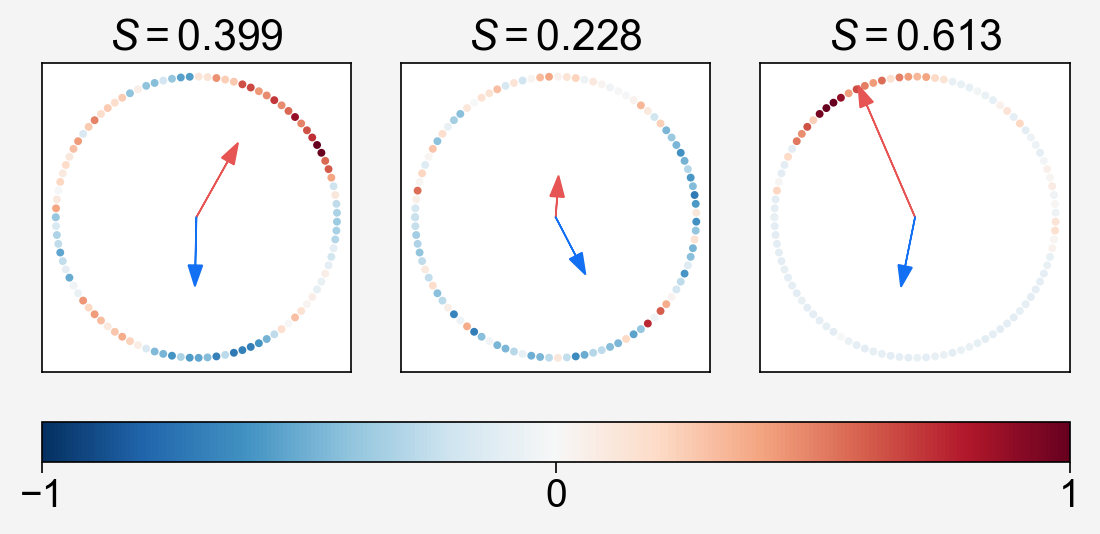

In [52]:
aux_tasks = ['none', 'wall0coef1', 'goaldistcoef1', 
             'catquadcoef1', 'catwall0coef1', 'catfacewallcoef1']
aux_batch_sizes = [16, 16, 16, 16, 16, 16]
aux_trials = [0, 0, 0, 0, 0, 0]
aux_chks = [300, 50, 1500, 1500, 1500, 1000]
aux_nodes = [0, 1, 0, 1, 0, 1]
activ_type = 'actor_activations'
layer_idx = 0

uniform_angles = np.linspace(-np.pi, np.pi, 100)
x = np.cos(uniform_angles)
y = np.sin(uniform_angles)

fig, ax = pplt.subplots(ncols=3, figwidth=5.5)
title = []
for i, j in enumerate([0, 2, 5]):
    aux = aux_tasks[j]
    batch = aux_batch_sizes[j]
    chk = aux_chks[j]
    trial = aux_trials[j]
    node = aux_nodes[j]
    
    angle_stats = all_angle_stats[batch][aux]['comb'][trial][chk][activ_type][layer_idx]
    
    weights = angle_stats['filtered_weights']

    pos_direction, pos_length, neg_direction, neg_length = positive_negative_resultants(weights)
    cbar = ax[i].scatter(x, y, c=weights[node], s=5, vmin=-1, vmax=1)
    # ax[i].plot([0, np.cos(direction)*length], [0, np.sin(direction)*length])
    ax[i].arrow(0, 0, np.cos(pos_direction[node])*pos_length[node], 
                np.sin(pos_direction[node])*pos_length[node],
                head_width=0.1, color=(0.9, 0.33, 0.33, 1))
    ax[i].arrow(0, 0, np.cos(neg_direction[node])*neg_length[node], 
                np.sin(neg_direction[node])*neg_length[node],
                head_width=0.1, color=(0.074, 0.44, 0.95, 1))
    score = (pos_length[node] + neg_length[node]) / 2
    title.append(f'$S = {score:.3f}$')
    
ax.format(xticks=[], yticks=[], title=title)
fig.colorbar(cbar, tickminor=False, locator=[-1, 0, 1], loc='b')
fig.savefig('plots/poster/direction_reps2.jpg', dpi=1200)


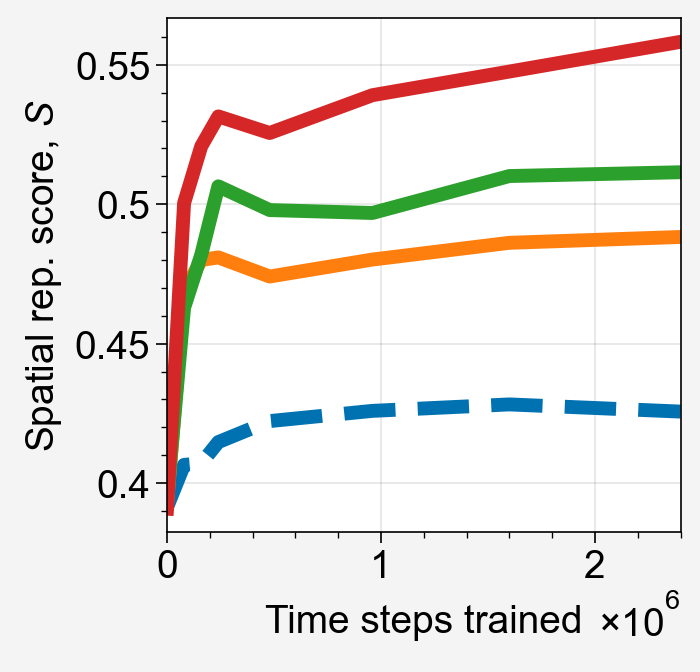

In [119]:
aux_type_tasks = {
    'num': ['wall1coef1'],
    'cat': ['catfacewallcoef1', 'catquadcoef1'],
}
aux_type_labels = {
    'num': ['Angle Distance (North)'],
    'cat': ['Faced Wall', 'Quadrant'],
}
batch_sizes = [16]

fig, ax = pplt.subplots(figwidth=3.5, sharex=False,
                       sharey=True)

for i, batch in enumerate(batch_sizes):
    trials = range(10)
    chks = all_chks[batch]
    activ_type = 'actor_activations'
    layer_idx = 0

    aux = 'none'
    ys = []
    for chk in chks:
        y = []
        for trial in trials:
            sil_scores = all_hm_spatial_scores[batch][aux]['comb'][trial][chk][activ_type][layer_idx]
            y.append(sil_scores)
        ys.append(np.mean(y))
    ax.plot(np.array(chks)*batch*100, ys, 
                  label='Control', linewidth=5, linestyle='--')

    count = 1

    for j, aux_type in enumerate(aux_type_tasks):
        for n, aux in enumerate(aux_type_tasks[aux_type]):
            ys = []
            for chk in chks:
                y = []
                for trial in trials:
                    sil_scores = all_hm_spatial_scores[batch][aux]['comb'][trial][chk][activ_type][layer_idx]
                    y.append(sil_scores)
                ys.append(np.mean(y))
                
            ax.plot(np.array(chks)*batch*100, ys, c=rgb_colors[count], 
                   label=aux_type_labels[aux_type][n], linewidth=5)
            count += 1

lines = []
count = 0
lines.append(ax.scatter([-5000000], [.5],
              c=rgb_colors[0], label='Control'))

for j, typ in enumerate(aux_type_tasks):
    for n, label in enumerate(aux_type_labels[typ]):
        count += 1
        lines.append(ax.scatter([-5000000], [.5],
                      c=rgb_colors[count], label=label))
    
ax.format(ylabel=r'Spatial rep. score, $S$', 
          xlabelpad=7, xlim=[0, 2.4e6])
ax.format(xlabel='Time steps trained')

fig.savefig('plots/poster/spatial_scores.jpg', dpi=1200)


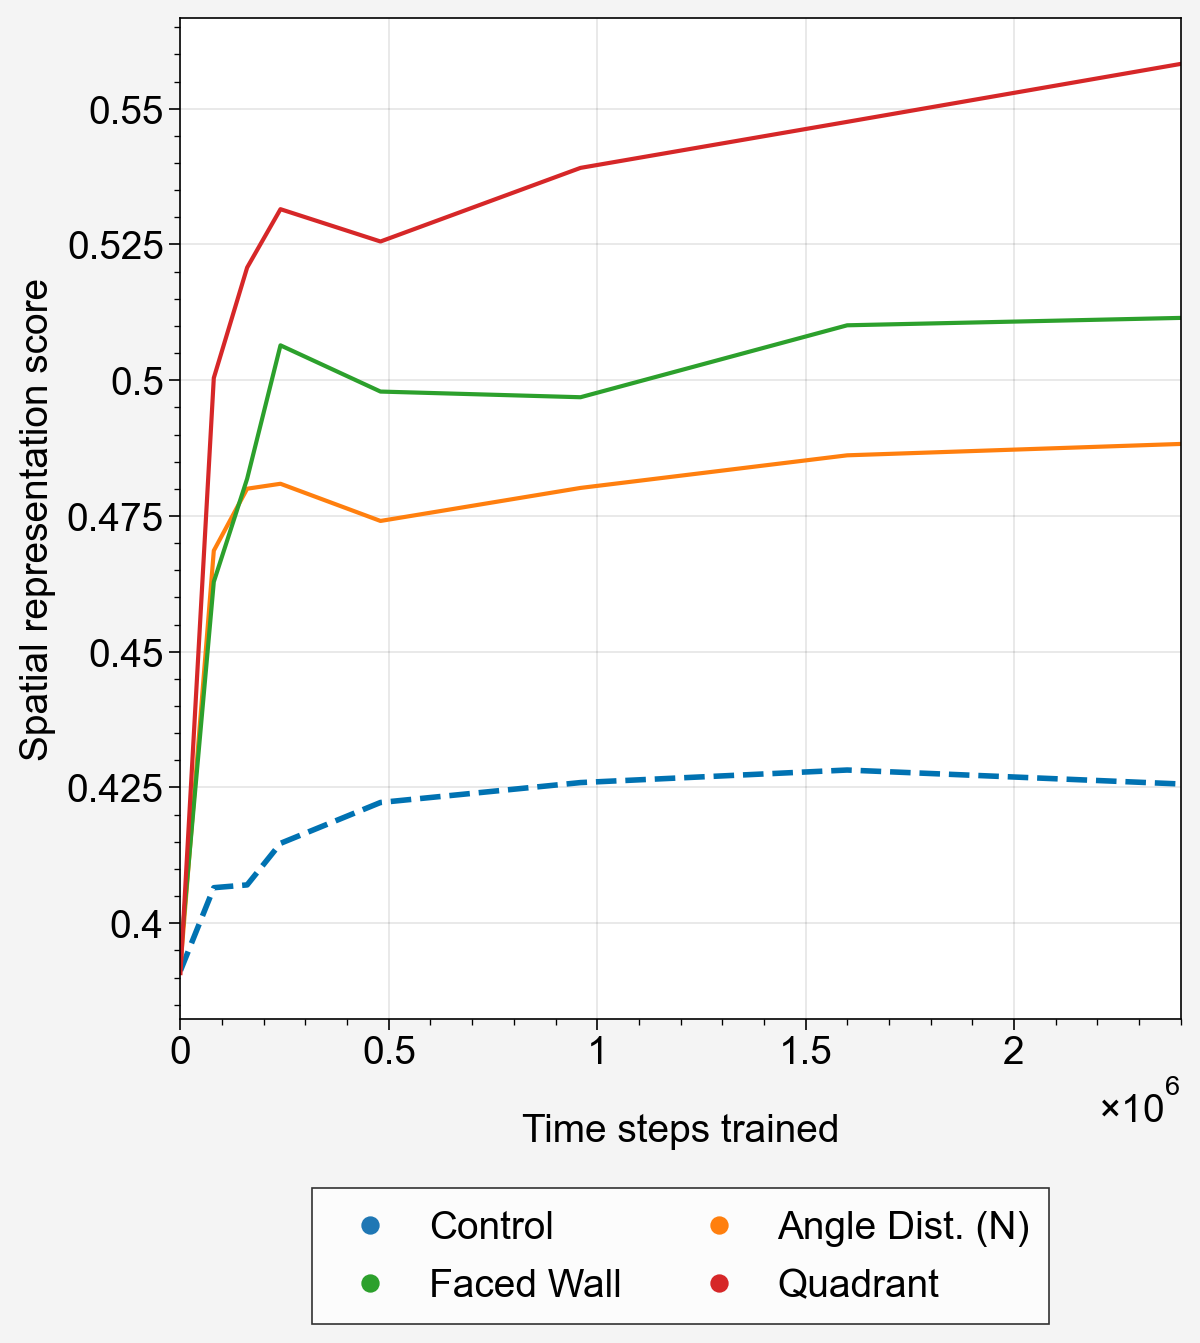

In [123]:
aux_type_tasks = {
    'num': ['wall1coef1'],
    'cat': ['catfacewallcoef1', 'catquadcoef1'],
}
aux_type_labels = {
    'num': ['Angle Dist. (N)'],
    'cat': ['Faced Wall', 'Quadrant'],
}
batch_sizes = [16]

fig, ax = pplt.subplots(figwidth=6, sharex=False,
                       sharey=True)

for i, batch in enumerate(batch_sizes):
    trials = range(10)
    chks = all_chks[batch]
    activ_type = 'actor_activations'
    layer_idx = 0

    aux = 'none'
    ys = []
    for chk in chks:
        y = []
        for trial in trials:
            sil_scores = all_hm_spatial_scores[batch][aux]['comb'][trial][chk][activ_type][layer_idx]
            y.append(sil_scores)
        ys.append(np.mean(y))
    ax.plot(np.array(chks)*batch*100, ys, 
                  label='Control', linewidth=2, linestyle='--')

    count = 1

    for j, aux_type in enumerate(aux_type_tasks):
        for n, aux in enumerate(aux_type_tasks[aux_type]):
            ys = []
            for chk in chks:
                y = []
                for trial in trials:
                    sil_scores = all_hm_spatial_scores[batch][aux]['comb'][trial][chk][activ_type][layer_idx]
                    y.append(sil_scores)
                ys.append(np.mean(y))
                
            ax.plot(np.array(chks)*batch*100, ys, c=rgb_colors[count], 
                   label=aux_type_labels[aux_type][n])
            count += 1

lines = []
count = 0
lines.append(ax.scatter([-5000000], [.5],
              c=rgb_colors[0], label='Control'))

for j, typ in enumerate(aux_type_tasks):
    for n, label in enumerate(aux_type_labels[typ]):
        count += 1
        lines.append(ax.scatter([-5000000], [.5],
                      c=rgb_colors[count], label=label))
    
fig.legend(lines, loc='b', ncols=2)
ax.format(ylabel='Spatial representation score', 
          xlabelpad=15, xlim=[0, 2.4e6])
ax.format(xlabel='Time steps trained')

fig.savefig('plots/poster/spatial_scores2.jpg', dpi=1200)


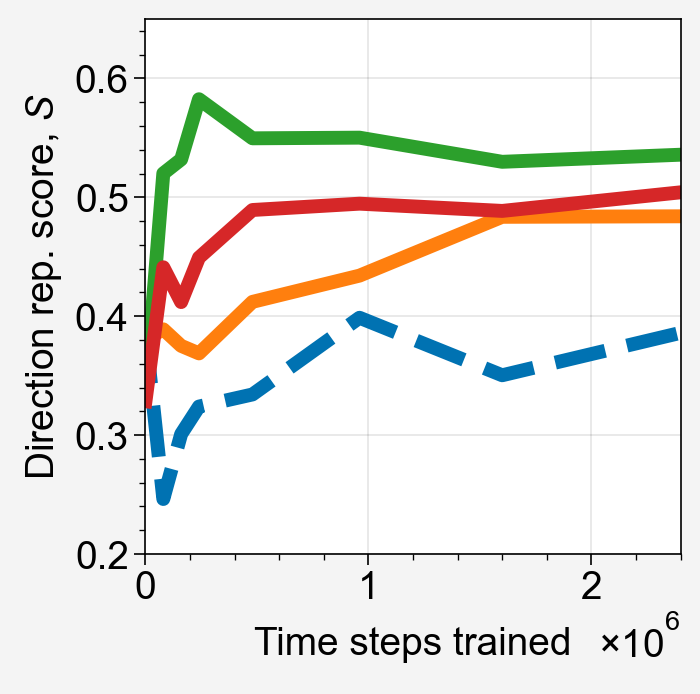

In [121]:
aux_type_tasks = {
    'num': ['wall1coef1'],
    'cat': ['catfacewallcoef1', 'catquadcoef1'],
}
aux_type_labels = {
    'num': ['Angle Distance (North)'],
    'cat': ['Faced Wall', 'Quadrant'],
}
batch_sizes = [16]

fig, ax = pplt.subplots(figwidth=3.5, sharex=False,
                       sharey=True)



for i, batch in enumerate(batch_sizes):
    trials = range(8)
    chks = all_chks[batch]
    activ_type = 'actor_activations'
    layer_idx = 0

    aux = 'none'
    ys = []
    for chk in chks:
        y = []
        for trial in trials:
            angle_stats = all_angle_stats[batch][aux]['comb'][trial][chk][activ_type][layer_idx]
            node_weights = angle_stats['filtered_weights']
            directions, lengths = positive_negative_resultants(node_weights, True)
            y.append(lengths)
        ys.append(np.mean(y))
    ax.plot(np.array(chks)*batch*100, ys, 
                  label='Control', linewidth=5, linestyle='--')
    
    count = 1
    for j, aux_type in enumerate(aux_type_tasks):
        for n, aux in enumerate(aux_type_tasks[aux_type]):
            ys = []
            for chk in chks:
                y = []
                for trial in trials:
                    angle_stats = all_angle_stats[batch][aux]['comb'][trial][chk][activ_type][layer_idx]
                    node_weights = angle_stats['filtered_weights']
                    directions, lengths = positive_negative_resultants(node_weights, True)
                    y.append(lengths)
                    # y.append(angle_stats['resultant_lengths'])
                ys.append(np.mean(y))
            ax.plot(np.array(chks)*batch*100, ys, c=rgb_colors[count], 
                       label=aux_type_labels[aux_type][n], linewidth=5)
            count += 1

lines = []
count = 0
lines.append(ax.scatter([-5000000], [.5],
              c=rgb_colors[0], label='Control'))

for j, typ in enumerate(aux_type_tasks):
    for n, label in enumerate(aux_type_labels[typ]):
        count += 1
        lines.append(ax.scatter([-5000000], [.5],
                      c=rgb_colors[count], label=label))


ax.format(ylabel=r'Direction rep. score, $S$', 
          # title=['Numerical Tasks', 'Categorical Tasks', 
          #       'Reward Tasks'],
          xlabelpad=7, xlim=[0, 2.4e6], ylim=[0.2, 0.65])
ax.format(xlabel='Time steps trained')

fig.savefig('plots/poster/direction_scores.jpg', dpi=1200)

# Performances

In [127]:
pplt.rc.update({'font.size': 16})

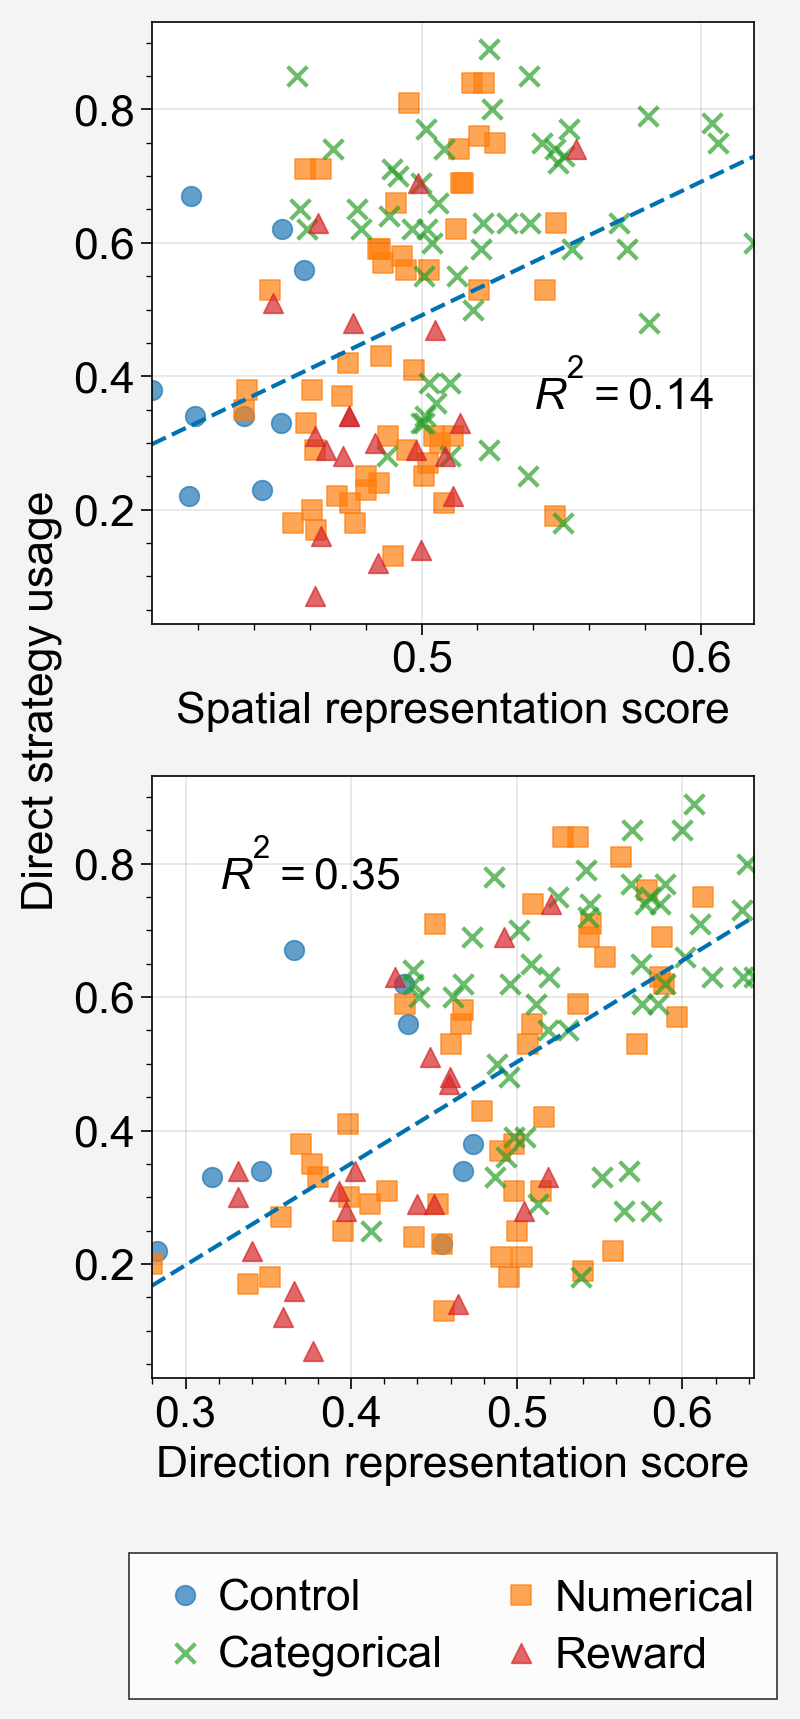

In [94]:

all_class_res = {
    'control': pickle.load(open('data/trajectories/cat_classification_results', 'rb')),
    'num': pickle.load(open('data/trajectories/num_classification_results', 'rb')),
    'cat': pickle.load(open('data/trajectories/cat_classification_results', 'rb')), #control is part of this
    'rew': pickle.load(open('data/trajectories/rew_classification_results', 'rb'))
}

all_aux_tasks = {
    'control': ['none'],
    'num': ['goaldist', 'wall0', 'wall1', 'wall01', 'terminal'],
    'cat': ['catfacewall', 'catquad', 'catwall0', 'catwall1', 'catwall01'],
    'rew': ['rewdistscale0015', 'rewexplore']
}

all_aux_labels = {
    'control': ['Control'],
    # 'num': ['GD', 'AD (E)', 'AD (N)', 'AD (N/E)', 'TP'],
    'num': ['Goal Dist.', 'Angle Dist. (E)', 
              'Angle Dist. (N)', 'Angle Dist. (N/E)', 
              'Terminal Pred.'],
    # 'cat': ['FW', 'QP', 'LR (E)', 'LR (N)', 'LR (E/N)']
    'cat': ['Faced Wall', 'Quadrant Pos.', 
              'Left Right (E)', 'Left Right (N)', 'Left Right (N/E)'],
    'rew': ['Dist. Bonus', 'Explore Bonus'],
}

aranged_vocab = { #ordering labels and their corresponding idx by importance
    1: 'direct',
    4: 'uncertain_direct',
    3: 'test_corner',
    0: 'circling',
    2: 'stuck'
}
behavior_labels = ['Direct', 'Indirect', 'Corner Test', 'Circling', 'Stuck']

fig, ax = pplt.subplots(nrows=2, figwidth=4, sharex=False)

chk = 1500
batch = 16
activ_type = 'actor_activations'
layer_idx = 0
trials = range(10)

aux_types = ['control', 'num', 'cat', 'rew']
titles = []

def best_fit_and_r_squared(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    y_pred = intercept + slope * x
    
    x_min = np.min(x)
    x_max = np.max(x)
    r_squared = r_value**2
    
    x_plot = np.array([x_min, x_max])
    y_plot = intercept + slope * x_plot
    return x_plot, y_plot, r_squared


ys = [[] for i in range(len(aux_types))]
head_xs = [[] for i in range(len(aux_types))]
spat_xs = [[] for i in range(len(aux_types))]
for n, typ in enumerate(aux_types):
    aux_tasks = all_aux_tasks[typ]
    aux_labels = all_aux_labels[typ]
    class_res = all_class_res[typ]
    for j, aux in enumerate(aux_tasks):        
        counts = [0 for i in range(len(aranged_vocab))]
        for trial in trials:
            if aux == 'none' and trial == 6:
                continue

            res = class_res[batch][aux][trial][chk]
            
            y = np.array([idx for idx in res['idxs']])
            ys[n].append((y == 1).sum() / 100)

            if typ in ['num', 'cat']:
                aux2 = aux+'coef1'
            else:
                aux2 = aux
            
            # Collect heading representation scores
            angle_stats = all_angle_stats[batch][aux2]['comb'][trial][chk][activ_type][layer_idx]
            node_weights = angle_stats['filtered_weights']
            directions, lengths = positive_negative_resultants(node_weights, True)
            head_xs[n].append(np.mean(lengths))
            
            # Collect spatial representation scores
            sil_scores = all_hm_spatial_scores[batch][aux2]['comb'][trial][chk][activ_type][layer_idx]
            spat_xs[n].append(np.mean(sil_scores))


task_type_labels = ['Control', 'Numerical', 'Categorical', 'Reward']
lines = []
for n in range(len(aux_types)):
    lines.append(ax[0].scatter(spat_xs[n], ys[n], c=rgb_colors[n], alpha=0.7, 
                  label=task_type_labels[n], marker=list(all_marker_styles.values())[n],
                s=50))
    ax[1].scatter(head_xs[n], ys[n], c=rgb_colors[n], alpha=0.7,
                  label=task_type_labels[n], marker=list(all_marker_styles.values())[n],
                 s=50)

    
# Plot lines of best fit
head_x = np.concatenate(head_xs)
spat_x = np.concatenate(spat_xs)
ys = np.concatenate(ys)

x, y, r = best_fit_and_r_squared(spat_x, ys)
ax[0].plot(x, y, linestyle='--')
ax[0].text(0.54, 0.35, f'$R^2 = {r:.2f}$')

x, y, r = best_fit_and_r_squared(head_x, ys)
ax[1].plot(x, y, linestyle='--')
ax[1].text(0.32, 0.76, f'$R^2 = {r:.2f}$')

    
# ax.format(abc='A.')
ax[0].format(xlabel='Spatial representation score', ylabel='Direct strategy usage')
ax[1].format(xlabel='Direction representation score')
fig.legend(lines, loc='b', ncols=2, pad=1.5, handletextpad=0, labelspacing=0.3,
          columnspacing=1, handlelength=1.5)

fig.savefig('plots/poster/rep_vs_strategy.jpg', dpi=1200)

In [130]:
class_res[16].keys()

dict_keys(['goaldist', 'wall0', 'wall1', 'wall01', 'terminal'])

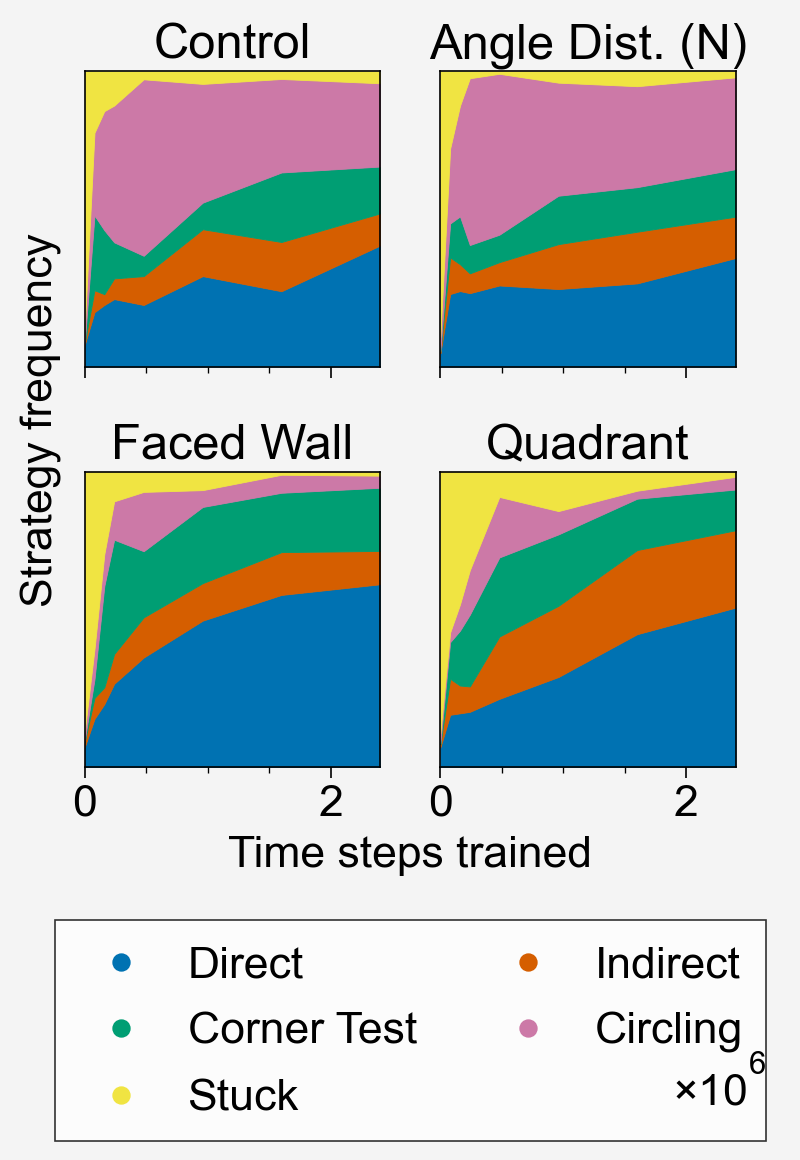

In [147]:
aux_type_tasks = {
    'control': ['none'],
    'num': ['wall1'],
    'cat': ['catfacewall', 'catquad'],
}
aux_type_labels = {
    'control': ['Control'],
    'num': ['Angle Dist. (N)'],
    'cat': ['Faced Wall', 'Quadrant'],
}

batch = 16
all_chks = {16: [0, 50, 100, 150, 300, 600, 1000, 1500],
            32: [0, 20, 40, 80, 150, 300, 600, 900]}
chks = all_chks[batch]
trials = range(10)

all_class_res = {
    'control': pickle.load(open('data/trajectories/cat_classification_results', 'rb')),
    'num': pickle.load(open('data/trajectories/num_classification_results', 'rb')),
    'cat': pickle.load(open('data/trajectories/cat_classification_results', 'rb')), #control is part of this
    'rew': pickle.load(open('data/trajectories/rew_classification_results', 'rb'))
}

aranged_vocab = { #ordering labels and their corresponding idx by importance
    1: 'direct',
    4: 'uncertain_direct',
    3: 'test_corner',
    0: 'circling',
    2: 'stuck'
}
behavior_labels = ['Direct', 'Indirect', 'Corner Test', 'Circling', 'Stuck']

fig, ax = pplt.subplots(nrows=2, ncols=2, figwidth=4,
                       sharey=False, spany=True, spanx=True)

aux_types = ['control', 'num', 'cat', 'rew']
titles = []
cur_ax_idx = 0
for typ in aux_type_tasks:
    aux_tasks = aux_type_tasks[typ]
    aux_labels = aux_type_labels[typ]
    class_res = all_class_res[typ]
    for j, aux in enumerate(aux_tasks):
        xs = []
        ys = [[] for i in range(len(aranged_vocab))]
        for chk in chks:
            mult = 1 if j == 3 else 1 / 1000000
            
            xs.append(chk * 100 * batch * mult)

            counts = [0 for i in range(len(aranged_vocab))]
            for trial in trials:
                if aux == 'none' and trial == 6:
                    continue
                
                res = class_res[batch][aux][trial][chk]

                #Count up amount of each label
                y = np.array([idx for idx in res['idxs']])
                for n, idx in enumerate(aranged_vocab):
                    counts[n] += (y == idx).sum()

            for n in range(len(counts)):
                ys[n].append(counts[n])

                
        ax[cur_ax_idx].stackplot(xs, *ys)
        titles.append(aux_labels[j])
        cur_ax_idx += 1

rgb_colors = color_cycle('colorblind')
ls = []
for n, label in enumerate(aranged_vocab.values()):
     ls.append(ax[0].scatter([0], [-100], label=behavior_labels[n], c=rgb_colors[n]))
        
ax.format(title=titles, ylim=[0, 1000], yticks=[],
         rc_kw={'grid.alpha': 0})
ax[0].format(ylim=[0, 900], ylabel='Strategy frequency',
            xlabel='Time steps trained')
ax[-1].format(xlim=[0, 2.4e6])
ax[:-1].format(xlim=[0, 2.4])

# ax[0].format(ylabel='Behavior Frequency', xlabel='Time steps trained', 
#              xlocator=[0, 2e6], xticklabels=['0', '2'], ylim=[0, 900])
# ax[1:].format(xticks=[])
fig.text(0.84, 0.065, r'$\times 10^6$', va='center')
fig.legend(ls, loc='b', ncols=2)

fig.savefig('plots/poster/strategy_preferences.jpg', dpi=1200)

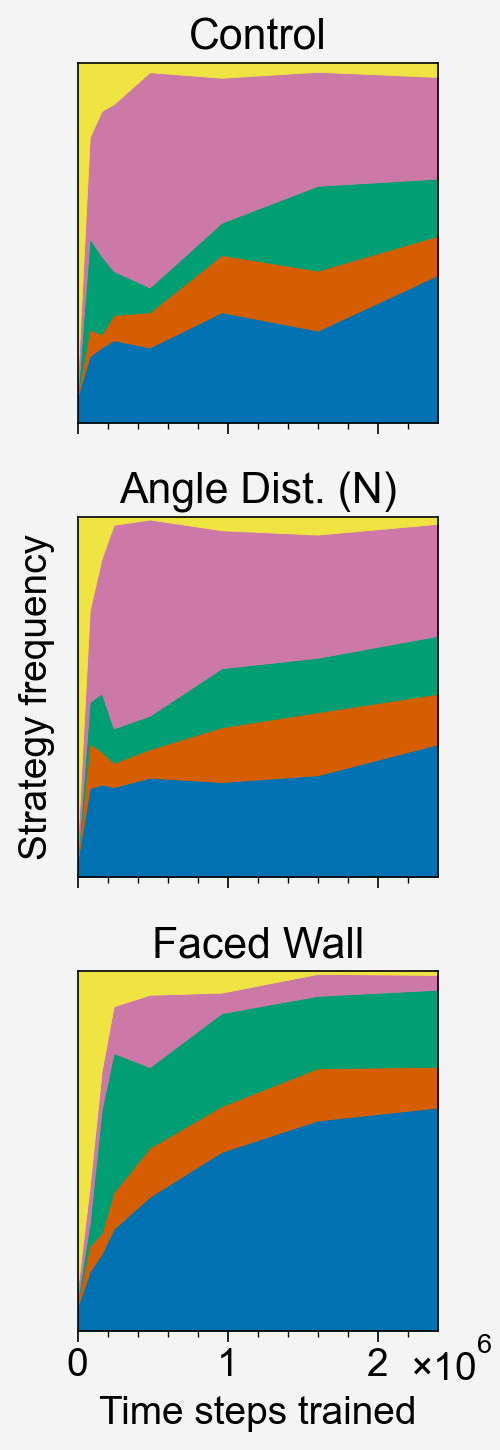

In [167]:
aux_type_tasks = {
    'control': ['none'],
    'num': ['wall1'],
    # 'cat': ['catfacewall', 'catquad'],
    'cat': ['catfacewall'],
}
aux_type_labels = {
    'control': ['Control'],
    'num': ['Angle Dist. (N)'],
    'cat': ['Faced Wall'],
}

batch = 16
all_chks = {16: [0, 50, 100, 150, 300, 600, 1000, 1500],
            32: [0, 20, 40, 80, 150, 300, 600, 900]}
chks = all_chks[batch]
trials = range(10)

all_class_res = {
    'control': pickle.load(open('data/trajectories/cat_classification_results', 'rb')),
    'num': pickle.load(open('data/trajectories/num_classification_results', 'rb')),
    'cat': pickle.load(open('data/trajectories/cat_classification_results', 'rb')), #control is part of this
    'rew': pickle.load(open('data/trajectories/rew_classification_results', 'rb'))
}

aranged_vocab = { #ordering labels and their corresponding idx by importance
    1: 'direct',
    4: 'uncertain_direct',
    3: 'test_corner',
    0: 'circling',
    2: 'stuck'
}
behavior_labels = ['Direct', 'Indirect', 'Corner Test', 'Circling', 'Stuck']

fig, ax = pplt.subplots(nrows=3, figwidth=2.5,
                       sharey=False, spany=True, spanx=True)

aux_types = ['control', 'num', 'cat', 'rew']
titles = []
cur_ax_idx = 0
for typ in aux_type_tasks:
    aux_tasks = aux_type_tasks[typ]
    aux_labels = aux_type_labels[typ]
    class_res = all_class_res[typ]
    for j, aux in enumerate(aux_tasks):
        xs = []
        ys = [[] for i in range(len(aranged_vocab))]
        for chk in chks:
            mult = 1 if j == 3 else 1 / 1000000
            
            xs.append(chk * 100 * batch * mult)

            counts = [0 for i in range(len(aranged_vocab))]
            for trial in trials:
                if aux == 'none' and trial == 6:
                    continue
                
                res = class_res[batch][aux][trial][chk]

                #Count up amount of each label
                y = np.array([idx for idx in res['idxs']])
                for n, idx in enumerate(aranged_vocab):
                    counts[n] += (y == idx).sum()

            for n in range(len(counts)):
                ys[n].append(counts[n])

                
        ax[cur_ax_idx].stackplot(xs, *ys)
        titles.append(aux_labels[j])
        cur_ax_idx += 1

rgb_colors = color_cycle('colorblind')
ls = []
for n, label in enumerate(aranged_vocab.values()):
     ls.append(ax[0].scatter([0], [-100], label=behavior_labels[n], c=rgb_colors[n]))
        
ax.format(title=titles, ylim=[0, 1000], yticks=[],
         rc_kw={'grid.alpha': 0})
ax[0].format(ylim=[0, 900],
            xlabel='Time steps trained')
ax[1].format(ylabel='Strategy frequency')
ax[-1].format(xlim=[0, 2.4e6])
ax[:-1].format(xlim=[0, 2.4])

# ax[0].format(ylabel='Behavior Frequency', xlabel='Time steps trained', 
#              xlocator=[0, 2e6], xticklabels=['0', '2'], ylim=[0, 900])
# ax[1:].format(xticks=[])
fig.text(0.82, 0.06, r'$\times 10^6$', va='center')
# fig.legend(ls, loc='b', ncols=1)

fig.savefig('plots/poster/strategy_preferences.jpg', dpi=1200)

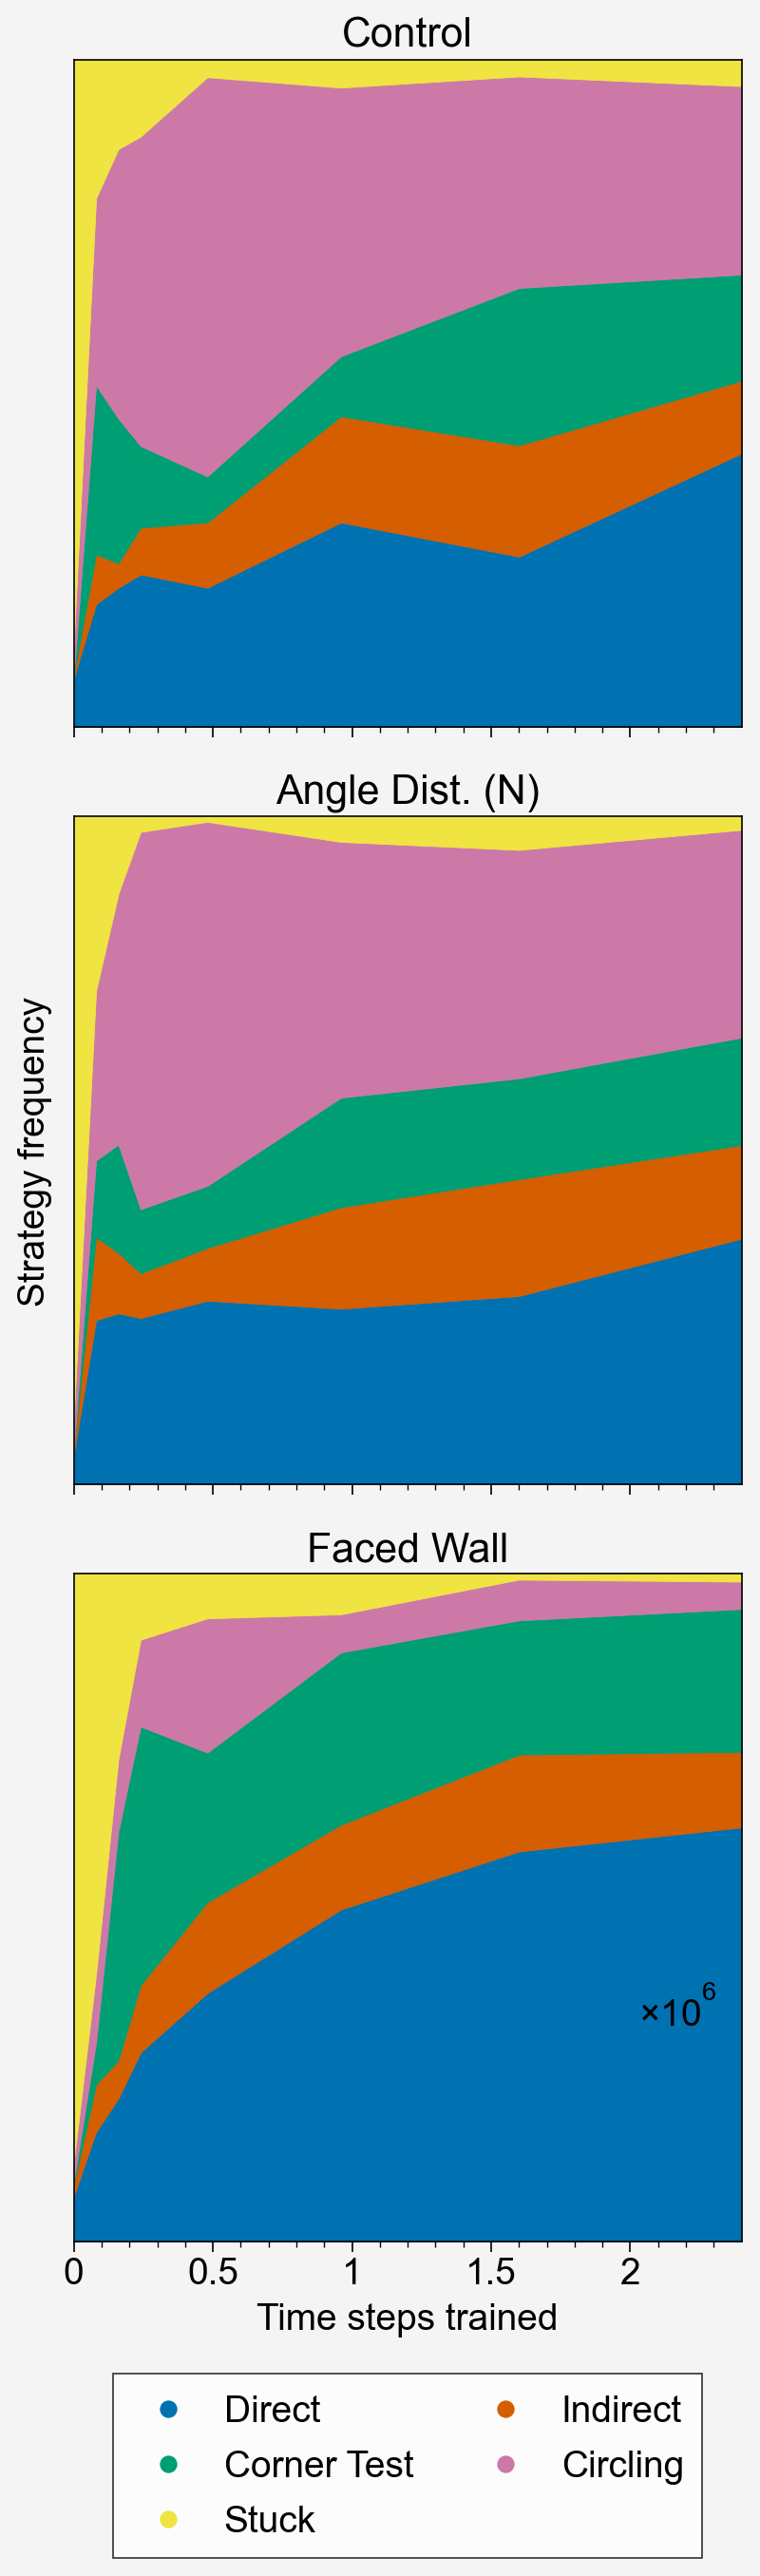

In [162]:
aux_type_tasks = {
    'control': ['none'],
    'num': ['wall1'],
    # 'cat': ['catfacewall', 'catquad'],
    'cat': ['catfacewall'],
}
aux_type_labels = {
    'control': ['Control'],
    'num': ['Angle Dist. (N)'],
    'cat': ['Faced Wall'],
}

batch = 16
all_chks = {16: [0, 50, 100, 150, 300, 600, 1000, 1500],
            32: [0, 20, 40, 80, 150, 300, 600, 900]}
chks = all_chks[batch]
trials = range(10)

all_class_res = {
    'control': pickle.load(open('data/trajectories/cat_classification_results', 'rb')),
    'num': pickle.load(open('data/trajectories/num_classification_results', 'rb')),
    'cat': pickle.load(open('data/trajectories/cat_classification_results', 'rb')), #control is part of this
    'rew': pickle.load(open('data/trajectories/rew_classification_results', 'rb'))
}

aranged_vocab = { #ordering labels and their corresponding idx by importance
    1: 'direct',
    4: 'uncertain_direct',
    3: 'test_corner',
    0: 'circling',
    2: 'stuck'
}
behavior_labels = ['Direct', 'Indirect', 'Corner Test', 'Circling', 'Stuck']

fig, ax = pplt.subplots(nrows=3, figwidth=4,
                       sharey=False, spany=True, spanx=True)

aux_types = ['control', 'num', 'cat', 'rew']
titles = []
cur_ax_idx = 0
for typ in aux_type_tasks:
    aux_tasks = aux_type_tasks[typ]
    aux_labels = aux_type_labels[typ]
    class_res = all_class_res[typ]
    for j, aux in enumerate(aux_tasks):
        xs = []
        ys = [[] for i in range(len(aranged_vocab))]
        for chk in chks:
            mult = 1 if j == 3 else 1 / 1000000
            
            xs.append(chk * 100 * batch * mult)

            counts = [0 for i in range(len(aranged_vocab))]
            for trial in trials:
                if aux == 'none' and trial == 6:
                    continue
                
                res = class_res[batch][aux][trial][chk]

                #Count up amount of each label
                y = np.array([idx for idx in res['idxs']])
                for n, idx in enumerate(aranged_vocab):
                    counts[n] += (y == idx).sum()

            for n in range(len(counts)):
                ys[n].append(counts[n])

                
        ax[cur_ax_idx].stackplot(xs, *ys)
        titles.append(aux_labels[j])
        cur_ax_idx += 1

rgb_colors = color_cycle('colorblind')
ls = []
for n, label in enumerate(aranged_vocab.values()):
     ls.append(ax[0].scatter([0], [-100], label=behavior_labels[n], c=rgb_colors[n]))
        
ax.format(title=titles, ylim=[0, 1000], yticks=[],
         rc_kw={'grid.alpha': 0})
ax[0].format(ylim=[0, 900],
            xlabel='Time steps trained')
ax[1].format(ylabel='Strategy frequency')
ax[-1].format(xlim=[0, 2.4e6])
ax[:-1].format(xlim=[0, 2.4])

# ax[0].format(ylabel='Behavior Frequency', xlabel='Time steps trained', 
#              xlocator=[0, 2e6], xticklabels=['0', '2'], ylim=[0, 900])
# ax[1:].format(xticks=[])
fig.text(0.84, 0.22, r'$\times 10^6$', va='center')
fig.legend(ls, loc='b', ncols=2)

fig.savefig('plots/poster/strategy_preferences2.jpg', dpi=1200)

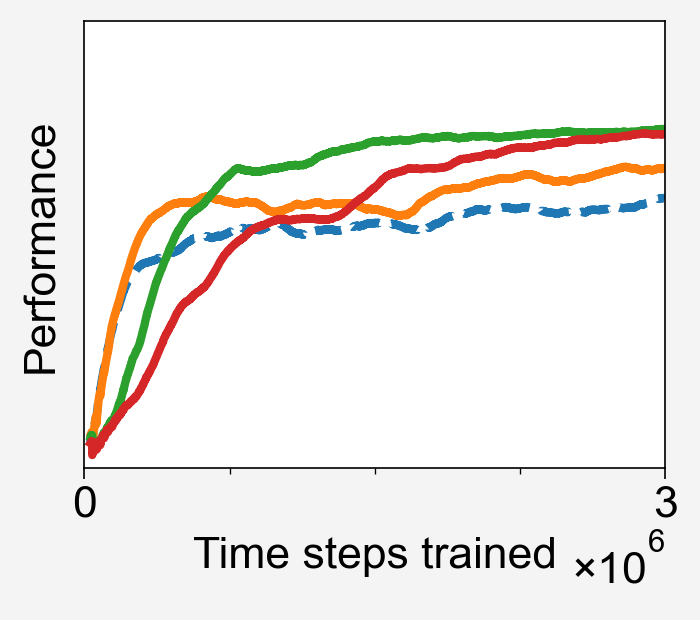

In [128]:
aux_tasks = ['none', 'wall1coef1', 'catfacewallcoef1', 'catquadcoef1',]
aux_labels = ['Control', 'Angle Dist. (N)', 'Faced Wall', 'Quadrant',]
aux_folders = ['nav_pdistal_batchaux', 'nav_pdistal_batchauxcoef1',
               'nav_pdistal_auxcatcoef1', 'nav_pdistal_auxcatcoef1']


fig, ax = pplt.subplots(figwidth=3.5, refaspect=1.3)


lines = []
for i, aux in enumerate(aux_tasks):
    ls = '--' if i == 0 else None
    exp_name = f'{aux_folders[i]}/nav_pdistal_batch16aux{aux}'
    xs, ys, min_x, max_x = average_runs(exp_name, 'length', ax=ax, ignore_first=100, div_x_by_mil=True,
                        color=rgb_colors[i], cloud_by='std', cloud_alpha=0, ewm=0.001, ret=True,)
    y_mid = (200 - np.mean(ys, axis=0)[100:])/200
    line = ax.plot(xs[100:], y_mid, ls=ls, linewidth=3, c=rgb_colors[i])
    lines.append(line)
    
ax.format(
    xlabel=r'Time steps trained', 
    ylabel='Performance',
    # title='Training Curves for Different Network Widths on Poster Environments',
    ylim=[0, 1],
    xlim=[0, 3e6],
    xlocator=[0, 3e6],
    ylocator=[]
)

# ax.legend(lines, labels=aux_labels, loc='lr', ncols=2)

fig.savefig('plots/poster/performance.jpg', dpi=1200)

